## Урок 8. Домашнее задание
### Снижение размерности данных

#### 1. Обучить любую модель классификации на датасете IRIS до применения PCA (d = 2) и после него. Сравнить качество классификации по отложенной выборке.

#### Реализуем алгоритм kNN на полном учебном датасете iris.

In [1]:
import numpy as np
from sklearn import model_selection
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
from matplotlib.colors import ListedColormap

In [2]:
X, y = load_iris(return_X_y=True)

# возьмем все признаки (всего в датасете их 4)
X.shape

(150, 4)

In [3]:
y.shape

(150,)

Разделим выборку на обучающую и тестовую

In [4]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2, random_state=1)

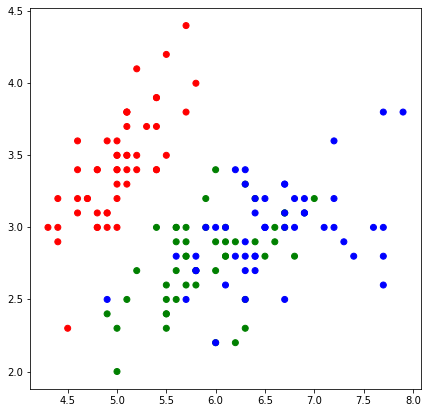

In [5]:
cmap = ListedColormap(['red', 'green', 'blue'])
plt.figure(figsize=(7, 7))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap)

Используем евклидову метрику. Реализуем функцию для ее подсчета.

In [6]:
def e_metrics(x1, x2):
    
    distance = 0
    for i in range(len(x1)):
        distance += np.square(x1[i] - x2[i])
    
    return np.sqrt(distance)

Реализуем алгоритм поиска k ближайших соседей с учетом весов $ w = q^{d}$ .

In [7]:
def knn(x_train, y_train, x_test, k, q = 0.5):
    
    answers = []
    for x in x_test:
        test_distances = []
            
        for i in range(len(x_train)):
            
            # расчет расстояния от классифицируемого объекта до
            # объекта обучающей выборки
            distance = e_metrics(x, x_train[i])
            
            # Записываем в список значение расстояния и ответа на объекте обучающей выборки
            test_distances.append((distance, y_train[i]))
        
        # создаем словарь со всеми возможными классами
        # classes= {class_item: 0 for class_item in set(y_train)}
        classes= {class_item: 0 for class_item in set(y_train)}

        # Сортируем список и среди первых k элементов подсчитаем частоту появления разных классов
        for d in sorted(test_distances)[0:k]:
            # classes[d[1]] += 1
            classes[d[1]] += (q ** d[1])  # прибавляем вес вместо "1". w = q**d
        # print(classes)    

        # print(sorted(classes, key=classes.get)[-1])    
        # Записываем в список ответов наиболее часто встречающийся класс
        answers.append(sorted(classes, key=classes.get)[-1])
    return answers

Напишем функцию для вычисления точности

In [8]:
def accuracy(pred, y):
    return (sum(pred == y) / len(y))

Проверим работу алгоритма при различных k

In [9]:
# алгоритим обучим для k из списка:
k_list = [2, 3, 5, 10]

In [10]:
KNN_accuracy_list = []

In [11]:
k = k_list[0]

y_pred = knn(X_train, y_train, X_test, k)
KNN_accuracy_list.append(accuracy(y_pred, y_test))
print(f'Точность алгоритма при k = {k}: {accuracy(y_pred, y_test):.3f}')

Точность алгоритма при k = 2: 1.000


Построим график распределения классов.

In [12]:
def get_graph(X_train, y_train, k):
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA','#00AAFF'])

    h = .02

    # Расчет пределов графика
    x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
    y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Получим предсказания для всех точек
    Z = knn(X_train, y_train, np.c_[xx.ravel(), yy.ravel()], k)

    # Построим график
    Z = np.array(Z).reshape(xx.shape)
    plt.figure(figsize=(7,7))
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Добавим на график обучающую выборку
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cmap)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title(f"Трехклассовая kNN классификация при k = {k}")
    plt.show()

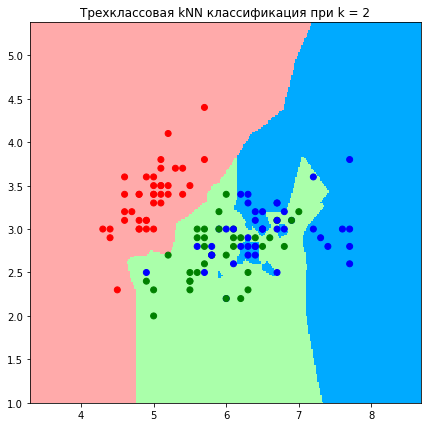

In [13]:
get_graph(X_train, y_train, k)

In [14]:
k = k_list[1]

y_pred = knn(X_train, y_train, X_test, k)
KNN_accuracy_list.append(accuracy(y_pred, y_test))
print(f'Точность алгоритма при k = {k}: {accuracy(y_pred, y_test):.3f}')

Точность алгоритма при k = 3: 1.000


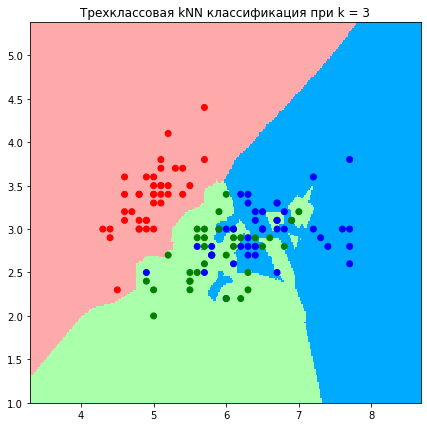

Wall time: 48.6 s


In [15]:
%%time
get_graph(X_train, y_train, k)

In [16]:
%%time
k = k_list[2]

y_pred = knn(X_train, y_train, X_test, k)
KNN_accuracy_list.append(accuracy(y_pred, y_test))
print(f'Точность алгоритма при k = {k}: {accuracy(y_pred, y_test):.3f}')

Точность алгоритма при k = 5: 0.967
Wall time: 39 ms


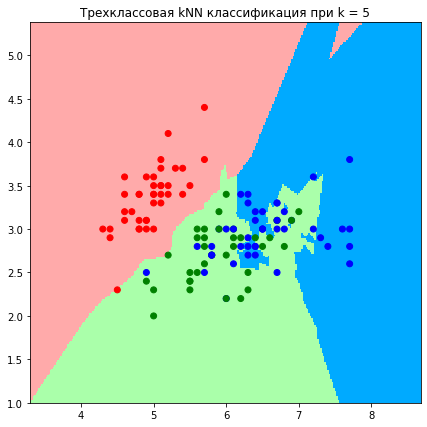

Wall time: 48.8 s


In [17]:
%%time
get_graph(X_train, y_train, k)

In [18]:
k = k_list[3]

y_pred = knn(X_train, y_train, X_test, k)
KNN_accuracy_list.append(accuracy(y_pred, y_test))
print(f'Точность алгоритма при k = {k}: {accuracy(y_pred, y_test):.3f}')

Точность алгоритма при k = 10: 1.000


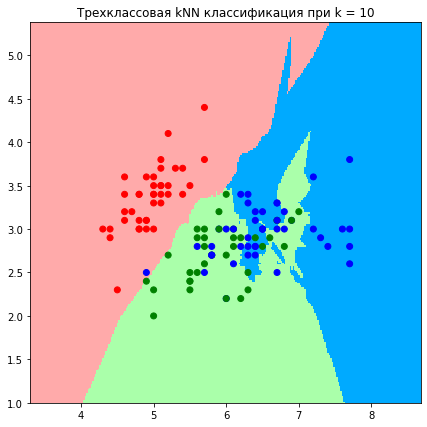

Wall time: 49.8 s


In [19]:
%%time
get_graph(X_train, y_train, k)

In [20]:
KNN_accuracy_list

[1.0, 1.0, 0.9666666666666667, 1.0]

#### Реализуем алгоритм kNN с понижением размерности PCA на том же учебном датасете iris.

In [21]:
# Для начала отмасштабируем выборку
X_ = X.astype(float)

rows, cols = X_.shape

# центрирование - вычитание из каждого значения среднего по строке
means = X_.mean(0)
for i in range(rows):
    for j in range(cols):
        X_[i, j] -= means[j]

# деление каждого значения на стандартное отклонение
std = np.std(X_, axis=0)
for i in range(cols):
    for j in range(rows):
        X_[j][i] /= std[i]

In [22]:
# Найдем собственные векторы и собственные значения (англ. Eigenvalues)
 
covariance_matrix = X_.T.dot(X_)

eig_values, eig_vectors = np.linalg.eig(covariance_matrix)

# сформируем список кортежей (собственное значение, собственный вектор)
eig_pairs = [(np.abs(eig_values[i]), eig_vectors[:, i]) for i in range(len(eig_values))]

# и отсортируем список по убыванию собственных значений
eig_pairs.sort(key=lambda x: x[0], reverse=True)

print('Собственные значения в порядке убывания:')
for i in eig_pairs:
    print(i)

Собственные значения в порядке убывания:
(437.77467247979905, array([ 0.52106591, -0.26934744,  0.5804131 ,  0.56485654]))
(137.1045707202104, array([-0.37741762, -0.92329566, -0.02449161, -0.06694199]))
(22.01353133569722, array([-0.71956635,  0.24438178,  0.14212637,  0.63427274]))
(3.1072254642928634, array([ 0.26128628, -0.12350962, -0.80144925,  0.52359713]))


Оценим долю дисперсии, которая описывается найденными компонентами.

In [23]:
eig_sum = sum(eig_values)
var_exp = [(i / eig_sum) * 100 for i in sorted(eig_values, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print(f'Доля дисперсии, описываемая каждой из компонент \n{var_exp}')

# а теперя оценим кумулятивную (то есть накапливаемую) дисперсию при учитывании каждой из компонент
print(f'Кумулятивная доля дисперсии по компонентам \n{cum_var_exp}')

Доля дисперсии, описываемая каждой из компонент 
[72.96244541329992, 22.850761786701757, 3.6689218892828737, 0.5178709107154778]
Кумулятивная доля дисперсии по компонентам 
[ 72.96244541  95.8132072   99.48212909 100.        ]


Таким образом, первая главная компонента описывает почти 73% информации, а первые две в сумме - 95.8%. В то же время последняя компонента описывает всего 0.5% и может быть отброжена без страха значительных потерь в качестве нашего анализа. Мы отбросим последние две компоненты, оставив первые две.

In [24]:
# Сформируем вектор весов из собственных векторов, соответствующих первым двум главным компонентам
W = np.hstack((eig_pairs[0][1].reshape(4,1), eig_pairs[1][1].reshape(4,1)))

print(f'Матрица весов W:\n', W)

Матрица весов W:
 [[ 0.52106591 -0.37741762]
 [-0.26934744 -0.92329566]
 [ 0.5804131  -0.02449161]
 [ 0.56485654 -0.06694199]]


In [25]:
# Сформируем новую матрицу "объекты-признаки"
# W как матрица перехода между 2мя базисами
Z = X_.dot(W)

In [26]:
Z[:10]

array([[-2.26470281, -0.4800266 ],
       [-2.08096115,  0.67413356],
       [-2.36422905,  0.34190802],
       [-2.29938422,  0.59739451],
       [-2.38984217, -0.64683538],
       [-2.07563095, -1.48917752],
       [-2.44402884, -0.0476442 ],
       [-2.23284716, -0.22314807],
       [-2.33464048,  1.11532768],
       [-2.18432817,  0.46901356]])

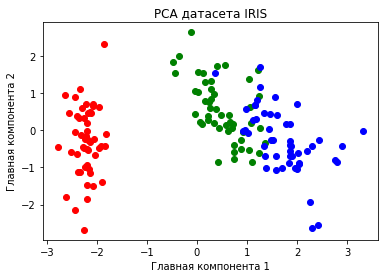

In [27]:
plt.figure()
# y = iris.target
for c, i in zip("rgb", [0, 1, 2]):
    plt.scatter(Z[y==i, 0], Z[y==i, 1], c=c)
plt.xlabel('Главная компонента 1')
plt.ylabel('Главная компонента 2')
plt.title('PCA датасета IRIS')
plt.show()

Сравним с PCA из библиотеки sklearn

In [28]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
XPCAreduced = pca.fit_transform(X_)

In [29]:
XPCAreduced[:10]

array([[-2.26470281,  0.4800266 ],
       [-2.08096115, -0.67413356],
       [-2.36422905, -0.34190802],
       [-2.29938422, -0.59739451],
       [-2.38984217,  0.64683538],
       [-2.07563095,  1.48917752],
       [-2.44402884,  0.0476442 ],
       [-2.23284716,  0.22314807],
       [-2.33464048, -1.11532768],
       [-2.18432817, -0.46901356]])

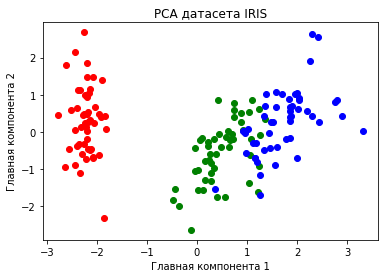

In [30]:
plt.figure()
# y = iris.target
for c, i in zip("rgb", [0, 1, 2]):
    plt.scatter(XPCAreduced[y==i, 0], XPCAreduced[y==i, 1], c=c)
plt.xlabel('Главная компонента 1')
plt.ylabel('Главная компонента 2')
plt.title('PCA датасета IRIS')
plt.show()

Таким образом, мы перешли от четырехмерного пространства признаков к двумерному и при этом классы остались разделимы в пространстве, то есть классификация возможна.

PCA наиболее хорошо работает, когда собственные значения $\lambda$ на каком-то участке графика распределения убывают скачкообразно (критерий крутого склона), другими словами, если существуют предпосылки к тому, что следует решать задачу в пространстве меньшей размерности. Если же они убывают монотонно, следует рассмотреть вариант использования других методов работы с пространством признаков.

#### Реализуем обучение и предсказание на датасете с пониженной размерностью

In [31]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(Z, y, test_size=0.2, random_state=1)

In [32]:
KNN_PCA_accuracy_list = []

In [33]:
k = k_list[0]

y_pred = knn(X_train, y_train, X_test, k)
KNN_PCA_accuracy_list.append(accuracy(y_pred, y_test))
print(f'Точность алгоритма при k = {k}: {accuracy(y_pred, y_test):.3f}')

Точность алгоритма при k = 2: 0.933


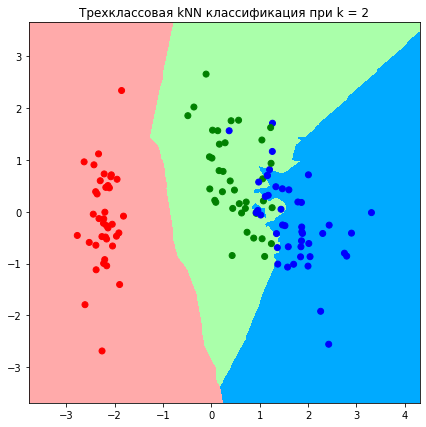

In [34]:
get_graph(X_train, y_train, k)

In [35]:
k = k_list[1]

y_pred = knn(X_train, y_train, X_test, k)
KNN_PCA_accuracy_list.append(accuracy(y_pred, y_test))
print(f'Точность алгоритма при k = {k}: {accuracy(y_pred, y_test):.3f}')

Точность алгоритма при k = 3: 0.967


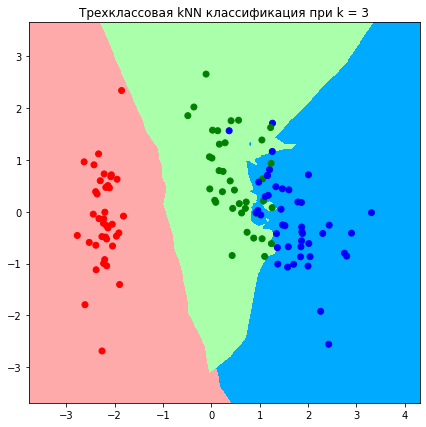

Wall time: 2min


In [36]:
%%time
get_graph(X_train, y_train, k)

In [37]:
k = k_list[2]

y_pred = knn(X_train, y_train, X_test, k)
KNN_PCA_accuracy_list.append(accuracy(y_pred, y_test))
print(f'Точность алгоритма при k = {k}: {accuracy(y_pred, y_test):.3f}')

Точность алгоритма при k = 5: 0.967


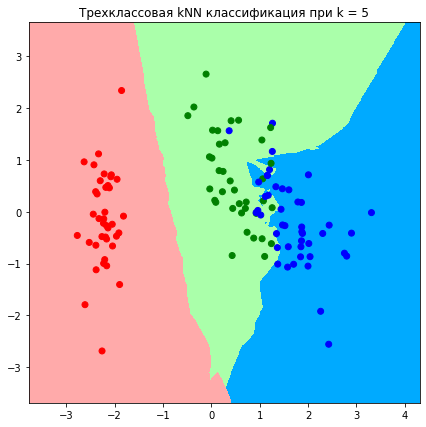

Wall time: 1min 59s


In [38]:
%%time
get_graph(X_train, y_train, k)

In [39]:
k = k_list[3]

y_pred = knn(X_train, y_train, X_test, k)
KNN_PCA_accuracy_list.append(accuracy(y_pred, y_test))
print(f'Точность алгоритма при k = {k}: {accuracy(y_pred, y_test):.3f}')

Точность алгоритма при k = 10: 0.967


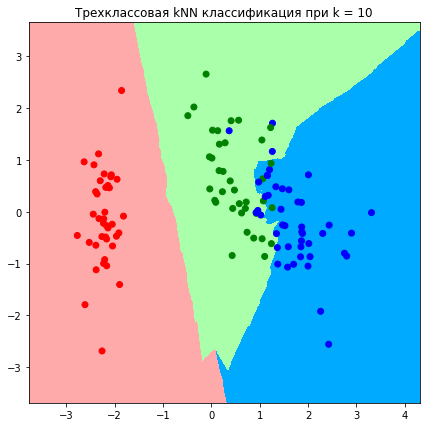

Wall time: 2min 2s


In [40]:
%%time
get_graph(X_train, y_train, k)

In [41]:
KNN_PCA_accuracy_list

[0.9333333333333333,
 0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667]

In [42]:
# Точность алгоритма аналогичного KNN_accuracy_list, но обученного по первым двум параметрам (из д/з предыдущего урока)
KNN_accuracy_list_2 = [0.700, 0.733, 0.733, 0.867]

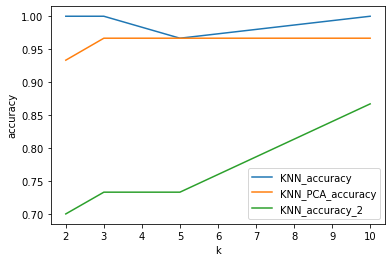

In [43]:
plt.xlabel('k')
plt.ylabel('accuracy')
plt.plot(k_list, KNN_accuracy_list, label='KNN_accuracy')
plt.plot(k_list, KNN_PCA_accuracy_list, label='KNN_PCA_accuracy')
plt.plot(k_list, KNN_accuracy_list_2, label='KNN_accuracy_2')
plt.legend(loc='lower right')
plt.show()

Из графика выше видно, что точность классификации KNN на всей модели получилась выше, при этом сочетание KNN c PCA также дает приемленмую точность, что может быть полезно на датасетах с большим количеством признаков - когда мы не сильно потеряем в качестве, но можем выиграть во времени. В свою очередь, сочетание KNN c PCA против KNN обученной только на двух признаках (из предыдущего урока) показывает более качественное предсказание при том, что в обоих методах использовались по сути только два признака.

#### 2*. Написать свою реализацию метода главных компонент с помощью сингулярного разложения с использованием функции numpy.linalg.svd().